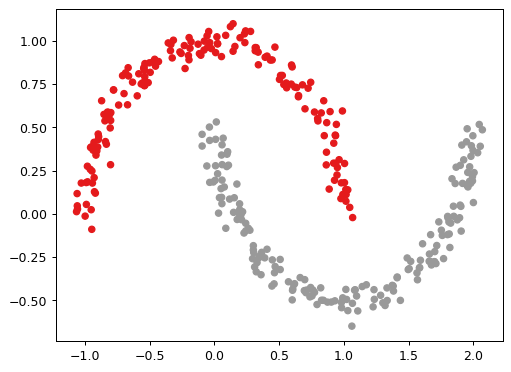

In [7]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
np.random.seed(0)
coord, cl = make_moons(500, noise=0.05)
X, Xt, y, yt = train_test_split(coord, cl,
    test_size=0.30)
cmap_set1 = plt.cm.Set1
fig, ax = plt.subplots(dpi=90)
ax.scatter(X[:,0], X[:,1], s=25, c=y, cmap=cmap_set1)
plt.show()

In [9]:
import tensorflow.keras as keras
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X, y, epochs=1000, batch_size=64,
    shuffle=True, verbose=0)

In [12]:
from sklearn.metrics import accuracy_score

# Previsões (0 ou 1) usando o threshold de 0.5
predictions = (model.predict(Xt) >= 0.5).astype(int)

# Acurácia no conjunto de teste
test_accuracy = accuracy_score(yt, predictions)

print(f"Accuracy on test set: {test_accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy on test set: 1.0


In [13]:
steps = 100
x_min, x_max = coord[:,0].min(), coord[:,0].max()
y_min, y_max = coord[:,1].min(), coord[:,1].max()
x_range = np.linspace(x_min, x_max, steps)
y_range = np.linspace(y_min, y_max, steps)
xx, yy = np.meshgrid(x_range, y_range)
xy = np.stack([np.ravel(xx), np.ravel(yy)], axis=1)
zz = model.predict(xy)
zz = zz.reshape(xx.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


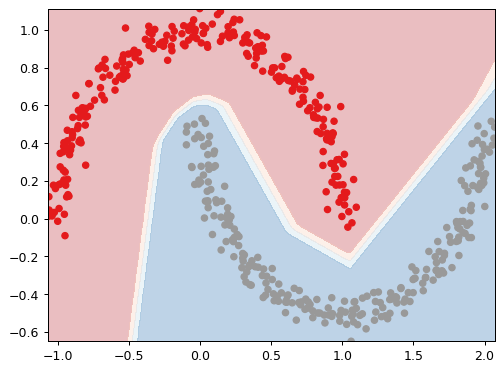

In [14]:
cmap_rb = plt.get_cmap('RdBu')
fig, ax = plt.subplots(dpi=90)
ax.contourf(xx, yy, zz, cmap=cmap_rb,
alpha=0.3, levels=3)
ax.scatter(coord[:,0], coord[:,1],
s=25, c=cl, cmap=cmap_set1)
plt.show()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<Figure size 640x480 with 0 Axes>

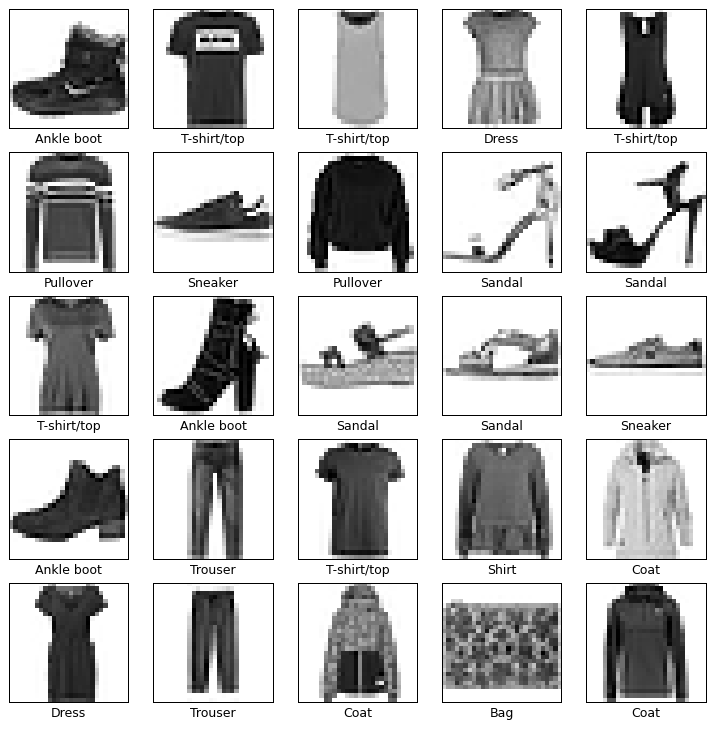

In [16]:
import tensorflow.keras as keras
loader = keras.datasets.fashion_mnist.load_data
(x_train, y_train), (x_test, y_test) = loader()
import matplotlib.pyplot as plt
class_names = {0: 'T-shirt/top', 1: 'Trouser',
    2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
    8: 'Bag', 9: 'Ankle boot'}
plt.figure()
fig, ax = plt.subplots(5, 5, figsize=(10, 10), dpi=90)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [20]:
classes = 10
x_train = (x_train / 255.).reshape(-1, 28, 28, 1)
x_test = (x_test / 255.).reshape(-1, 28, 28, 1)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(classes, activation='softmax'))
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │       294,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,090 (1.20 MB)

 Trainable params: 314,090 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train, y_train,
    batch_size=64,
    epochs=11,
    verbose=1,
    validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy on test set: {score[1]:0.3}')

Epoch 1/11


2025-09-18 16:43:59.587499: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - acc: 0.5644 - loss: 1.1693 - val_acc: 0.7473 - val_loss: 0.6620
Epoch 2/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - acc: 0.7136 - loss: 0.7512 - val_acc: 0.7742 - val_loss: 0.5839
Epoch 3/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - acc: 0.7395 - loss: 0.6812 - val_acc: 0.7862 - val_loss: 0.5413
Epoch 4/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - acc: 0.7561 - loss: 0.6416 - val_acc: 0.7973 - val_loss: 0.5230
Epoch 5/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - acc: 0.7649 - loss: 0.6156 - val_acc: 0.8049 - val_loss: 0.5105
Epoch 6/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - acc: 0.7745 - loss: 0.5942 - val_acc: 0.8135 - val_loss: 0.4852
Epoch 7/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - acc: 0.7814 - loss: 0.5784 - val_acc: 0.8096 - val_loss: 0.5016
Epoch 8/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - acc: 0.7849 - loss: 0.5651 - val_acc: 0.8221 - val_loss: 0.4731
Epoch 9/11
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/st

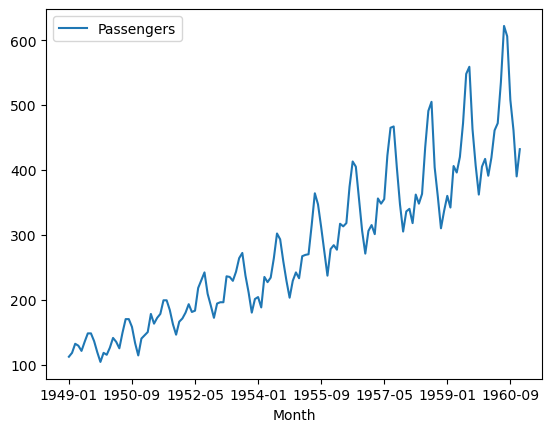

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'https://github.com/lmassaron/datasets/'
filename += 'releases/download/1.0/'
filename += 'air_passengers.feather'
passengers = pd.read_feather(filename)
passengers = passengers.set_index('Month')
passengers.plot()
plt.show()

In [25]:
lookback = 12
sequence = pd.DataFrame(
    {'shift_'+str(s): passengers['Passengers'].shift(s)
        for s in range(lookback+1)})[lookback:]

In [26]:
y = sequence.iloc[:, 0]
X = sequence.iloc[:, 1:]
max_value = np.max(y)
y /= max_value
X /= max_value
shape = list(X.shape)
shape.insert(1, 1)
print(shape)
X = X.values.reshape(shape)

[132, 1, 12]


In [27]:
y_train = y[:-24]
y_test = y[-24:]
X_train = X[:-24]
X_test = X[-24:]

In [28]:
import tensorflow.keras as keras
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=4,
    input_shape=(1, lookback)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error',
    optimizer='adam')
model.summary()

/home/arlindo/anaconda3/envs/TF_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4)              │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train, y_train,
    epochs=300,
    batch_size=8,
    shuffle=True,
    verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
RMSE for test set: 47.5


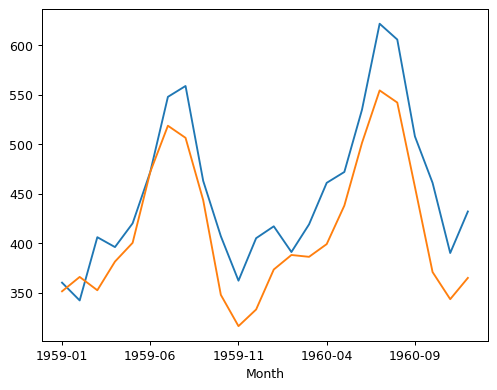

In [30]:
preds = model.predict(X_test) * max_value
real = y_test * max_value
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true=real, y_pred=preds))
print(f"RMSE for test set: {rmse:0.3}")
fig, ax = plt.subplots(dpi=90)
real.plot()
ax.plot(preds)
plt.show()

In [31]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
svm = make_pipeline(MinMaxScaler(
    feature_range=(-1, 1)),
    SVC(gamma='auto'))

In [37]:
cv_acc = cross_val_score(svm, X_train, y_train, cv=10)
test_acc = (svm.fit(X_train, y_train)
    .score(X_test, y_test))
print(f"Cross-validation accuracy: {np.mean(cv_acc):0.4f}")
print(f'Test accuracy: {test_acc:0.4f}')

Cross-validation accuracy: 0.9847
Test accuracy: 0.9806


In [39]:
from sklearn.model_selection import GridSearchCV
search_space = [{'svc__kernel': ['linear'],
    'svc__C': np.logspace(-3, 3, 7)},
    {'svc__kernel': ['rbf'],
    'svc__C':np.logspace(-3, 3, 7),
    'svc__gamma': np.logspace(-3, 2, 6)}]
gridsearch = GridSearchCV(svm,
    param_grid=search_space,
    refit=True, cv=10,
    n_jobs=-2)
gridsearch.fit(X_train, y_train)
print(f'Best parameter: {gridsearch.best_params_}')
cv_acc = gridsearch.best_score_
test_acc = gridsearch.score(X_test, y_test)
print(f'Cross-validation accuracy: {np.mean(cv_acc):0.4f}')
print(f'Test accuracy: {test_acc:0.4f}')

Best parameter: {'svc__C': np.float64(10.0), 'svc__gamma': np.float64(0.01), 'svc__kernel': 'rbf'}
Cross-validation accuracy: 0.9889
Test accuracy: 0.9861


In [41]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style='whitegrid', palette='deep',
    font='sans-serif')
except:
    import matplotlib.pyplot as plt
filename = 'https://github.com/lmassaron/datasets/'
filename+='releases/download/1.0/wine_quality.feather'
wine = pd.read_feather(filename)
np.random.seed(42)
train = (wine.groupby('quality')
    .apply(lambda x: x.sample(frac=.7))
    .reset_index(drop=True))
test = wine[~wine.index.isin(train.index)]
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

/tmp/ipykernel_8975/1458269597.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=.7))


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
series = [10, 25, 50, 100, 150, 200, 250, 300, 500]
test_scores = list()
for param in series:
    rf = RandomForestRegressor(n_estimators=param,
        max_depth=14, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

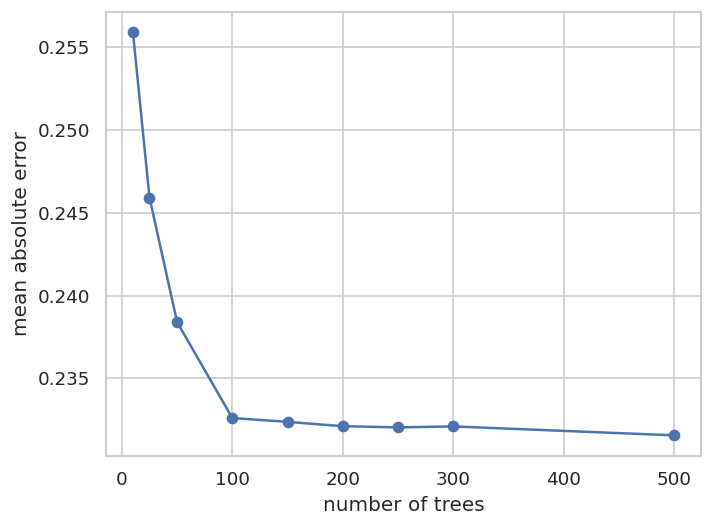

In [52]:
test_scores = []

for n in series:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    test_scores.append(mae)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=120)
plt.plot(series, test_scores, '-o')
plt.xlabel('number of trees')
plt.ylabel('mean absolute error')
plt.show()

In [54]:
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=500,
    max_features='sqrt',
    random_state=42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"test mean absolute error for rf: {mae:0.3}")

test mean absolute error for rf: 0.228


/tmp/ipykernel_8975/1393450837.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T,


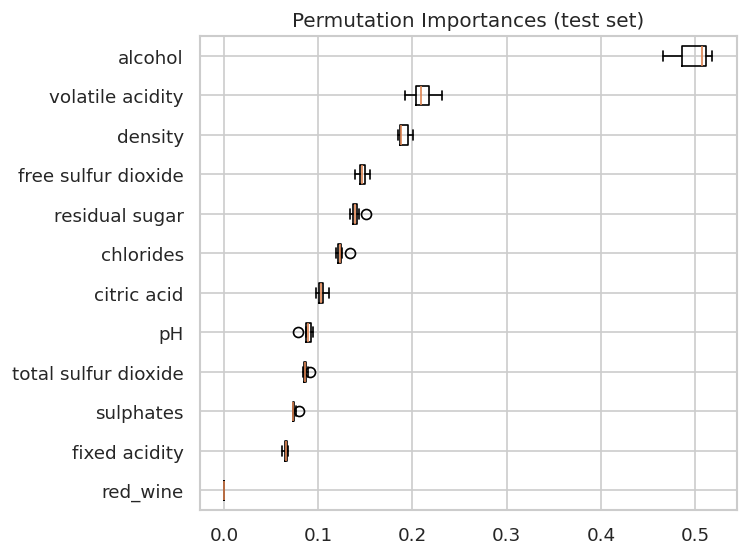

In [56]:
result = permutation_importance(rf, X_test,
    y_test, n_repeats=10, random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots(dpi=120)
ax.boxplot(result.importances[sorted_idx].T,
    vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [65]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
dt = DecisionTreeRegressor(max_depth=14)
lr = Ridge(alpha=1.0)
knn = KNeighborsRegressor(n_neighbors=1)
model_labels = ['Decision trees', 'Linear regression', 'KNN']
models = [dt, lr, knn]
for label, model in zip(model_labels, models):
    ada_model = AdaBoostRegressor(model,
        n_estimators=300, random_state=42)
    ada_model.fit(X_train, y_train)
    preds = ada_model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    print(f"test mae for {label}: {mae:0.3}")

test mae for Decision trees: 0.154
test mae for Linear regression: 0.554
test mae for KNN: 0.165


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=500,
    subsample=0.9,
    max_depth=12,
    learning_rate=0.1,
    random_state=42)
gbm.fit(X_train, y_train)
preds = gbm.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"test mean absolute error for gbm: {mae:0.3}")

test mean absolute error for gbm: 0.118


In [67]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
gbm = GradientBoostingRegressor(n_estimators=500,
    subsample=0.9, max_depth=12,
    learning_rate=0.1,random_state=42)
svr = SVR(C=10.0, gamma=0.3, epsilon=0.0001)
blender = VotingRegressor(
    estimators=[('gbm', gbm), ('svm', svr)], n_jobs=-2)
blender.fit(X_train, y_train)
preds = blender.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"test mean absolute error for blender: {mae:0.3}")

test mean absolute error for blender: 0.115


In [68]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import StratifiedKFold
gbm = GradientBoostingRegressor(n_estimators=300,
    subsample=0.9, max_depth=16,
    learning_rate=0.1, random_state=42)
svr = SVR(C=10.0, gamma=0.4, epsilon=0.0001)
sfk = StratifiedKFold(n_splits=10, shuffle=True,
    random_state=42)
stacker = StackingRegressor(estimators=[('svm', svr)],
    final_estimator=gbm, passthrough=True,
    cv=sfk, n_jobs=-2)
stacker.fit(X_train, y_train)
preds = stacker.predict(X_test)
mae = mean_absolute_error(y_test, preds)
print(f"test mean absolute error for stacker: {mae:0.3}")

test mean absolute error for stacker: 0.164


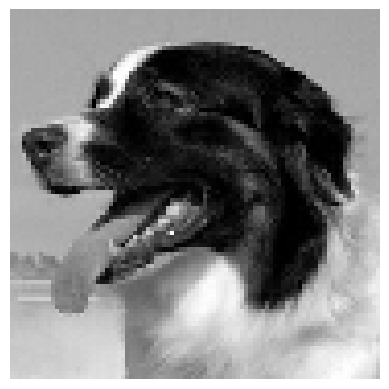

In [71]:
import requests
from skimage.io import imread
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from io import BytesIO

url = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"

# baixar com user-agent
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
image = imread(BytesIO(response.content), as_gray=True)

plt.imshow(image, cmap=cm.gray)
plt.axis('off')
plt.show()


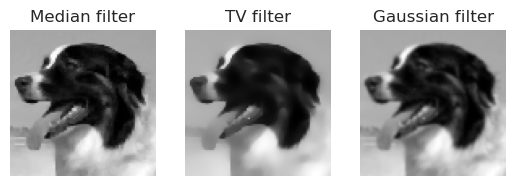

In [72]:
from skimage import filters, restoration, util
from skimage.morphology import disk
conv_image = util.img_as_ubyte(image)
median_filter = filters.rank.median(conv_image,
    disk(1))
tv_filter = restoration.denoise_tv_chambolle(
    conv_image, weight=0.1)
gaussian_filter = filters.gaussian(
    conv_image, sigma=0.7)
fig = plt.figure()
for k,(t,F) in enumerate((('Median filter',
                            median_filter),
                ('TV filter',tv_filter),
                ('Gaussian filter', gaussian_filter))):
    f=fig.add_subplot(1,3,k+1)
    plt.axis('off')
    f.set_title(t)
    plt.imshow(F, cmap=cm.gray)
plt.show()

In [73]:
print("data type: %s, shape: %s" %
    (type(median_filter), median_filter.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90)


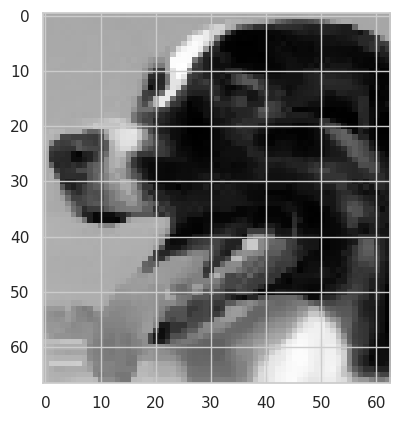

In [74]:
image2 = median_filter[7:74,2:65]
plt.imshow(image2, cmap=cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30)


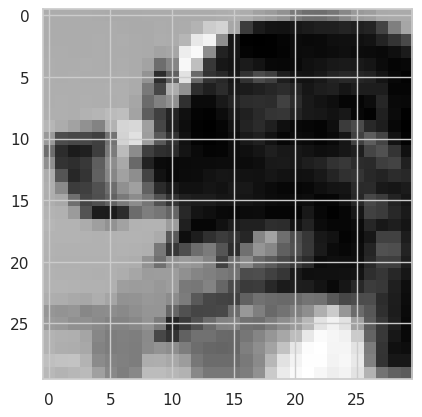

In [77]:
image3 = resize(image2, (30, 30), mode='edge',
    anti_aliasing=True)

print("data type: %s, shape: %s" %
    (type(image3), image3.shape))
plt.imshow(image3, cmap=cm.gray)
plt.show()

In [79]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %
    (type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (900,)


In [ ]:
# Detection > Localization > Segmentation

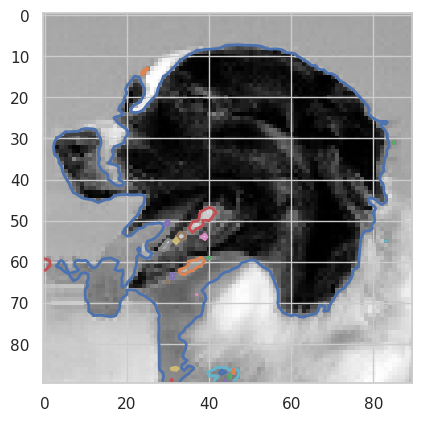

In [80]:
from skimage import measure
contours = measure.find_contours(image, 0.55)
plt.imshow(image, cmap=cm.gray)
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.axis('image')
plt.show()

In [82]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True,
    random_state=101)
train_faces = dataset.data[:350,:]
test_faces = dataset.data[350:,:]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/arlindo/scikit_learn_data


In [83]:
print (dataset.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [86]:
from sklearn.decomposition import PCA as RandomizedPCA
n_components = 25
Rpca = RandomizedPCA(n_components=n_components,
                    whiten=True,
                    random_state=101).fit(train_faces)
print ('Explained variance by %i components: %0.3f' %
    (n_components,
        np.sum(Rpca.explained_variance_ratio_)))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)

Explained variance by 25 components: 0.794


We are looking for face id=34


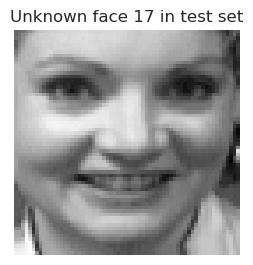

In [87]:
import matplotlib.pyplot as plt
photo = 17 # This is the photo in the test set we
# want to know about
print ('We are looking for face id=%i'
    % test_answers[photo])
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64),
            cmap=plt.cm.gray
            , interpolation='nearest')
plt.show()

In [93]:
# Just the vector of value components of our photo
mask = compressed_test_faces[photo,]

squared_errors = np.sum((compressed_train_faces - mask)**2, axis=1)

minimum_error_face = np.argmin(squared_errors)

most_resembling = list(np.where(squared_errors < 20)[0])
print ('Best resembling face in train test: %i' %
    train_answers[minimum_error_face])

Best resembling face in train test: 34


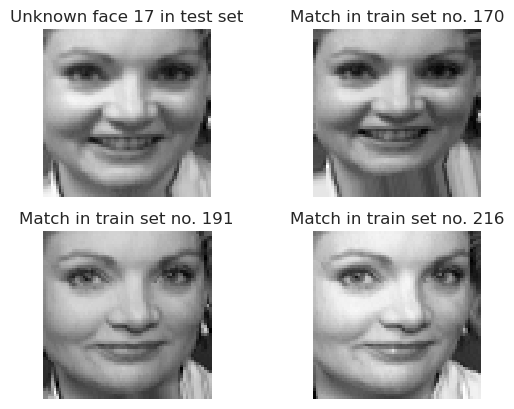

In [94]:
import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face '+str(photo)+' in test set')
plt.imshow(test_faces[photo].reshape(64,64),
            cmap=plt.cm.gray, interpolation='nearest')
for k,m in enumerate(most_resembling[:3]):
    plt.subplot(2, 2, 2+k)
    plt.title('Match in train set no. '+str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64,64),
                cmap=plt.cm.gray,
                interpolation='nearest')
plt.show()

In [98]:
from sklearn.datasets import fetch_lfw_people
import warnings
warnings.filterwarnings("ignore")
lfw_people = fetch_lfw_people(min_faces_per_person=60,  resize=0.4)
X = lfw_people.data
y = lfw_people.target
target_names = [lfw_people.target_names[a] for a in y]

n_samples, h, w = lfw_people.images.shape
from collections import Counter
for name, count in Counter(target_names).items():
    print ("%20s %i" % (name, count))

        Colin Powell 236
       George W Bush 530
         Hugo Chavez 71
   Junichiro Koizumi 60
          Tony Blair 144
        Ariel Sharon 77
     Donald Rumsfeld 121
   Gerhard Schroeder 109


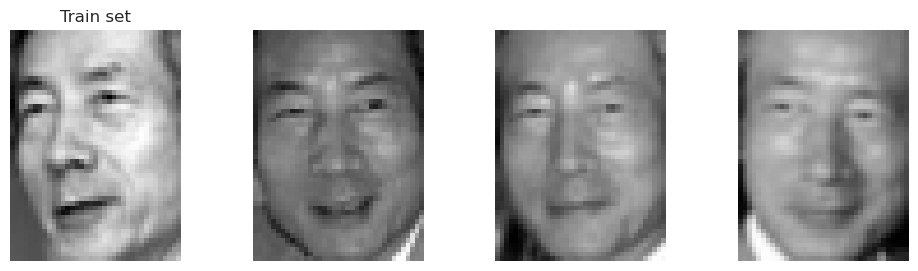

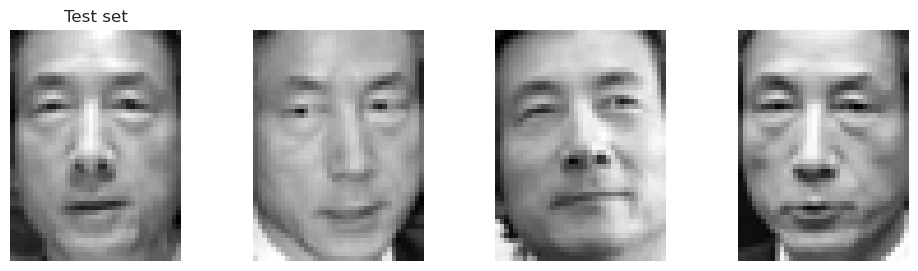

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.1,
    random_state=101
).split(X, y)

train, test = list(split)[0]

# Mostrando exemplos do train set
plt.figure(figsize=(12,3))
for k, m in enumerate(X[train][y[train] == 6][:4]):
    plt.subplot(1, 4, 1 + k)
    if k == 0:
        plt.title('Train set')
    plt.axis('off')
    plt.imshow(m.reshape(50,37), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

# Mostrando exemplos do test set
plt.figure(figsize=(12,3))
for k, m in enumerate(X[test][y[test] == 6][:4]):
    plt.subplot(1, 4, 1 + k)
    if k == 0:
        plt.title('Test set')
    plt.axis('off')
    plt.imshow(m.reshape(50,37), cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [103]:
import numpy as np
from sklearn import decomposition

pca = decomposition.PCA(n_components=n_components,
    whiten=True,
    svd_solver='randomized').fit(X[train,:])
nmf = decomposition.NMF(n_components=n_components,
                        init='nndsvda',
                        tol=5e-3).fit(X[train,:])
fastica = decomposition.FastICA(
    n_components=n_components,
    whiten='unit-variance'
).fit(X[train,:])


eigenfaces = pca.components_.reshape((n_components, h, w))
X_dec = np.column_stack((pca.transform(X[train,:]),
                         nmf.transform(X[train,:]),
                         fastica.transform(X[train,:])))
Xt_dec = np.column_stack((pca.transform(X[test,:]),
                          nmf.transform(X[test,:]),
                          fastica.transform(X[test,:])))
y_dec = y[train]
yt_dec = y[test]


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                'gamma': [0.0001, 0.001, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5)

clf = clf.fit(X_dec, y_dec)
print("Best parameters: %s" % clf.best_params_)

Best parameters: {'C': 10.0, 'gamma': 0.01}


In [110]:
from sklearn.metrics import accuracy_score
solution = clf.predict(Xt_dec)
print("Achieved accuracy: %0.3f" %
    accuracy_score(yt_dec, solution))

Achieved accuracy: 0.726


In [112]:
from sklearn.metrics import confusion_matrix
confusion = str(confusion_matrix(yt_dec, solution))
print (' '*26+ ' '.join(map(str,range(8))))
print (' '*26+ '-'*22)
for n, (label, row) in enumerate(zip(lfw_people.target_names,
    confusion.split('\n'))):
        print('%s %18s &gt; %s' % (n, label, row))

                          0 1 2 3 4 5 6 7
                          ----------------------
0       Ariel Sharon &gt; [[ 4  1  1  1  1  0  0  0]
1       Colin Powell &gt;  [ 2 18  0  3  1  0  0  0]
2    Donald Rumsfeld &gt;  [ 0  1 10  1  0  0  0  0]
3      George W Bush &gt;  [ 3  3  3 41  1  0  0  2]
4  Gerhard Schroeder &gt;  [ 0  0  0  2  7  0  0  2]
5        Hugo Chavez &gt;  [ 0  0  0  1  1  5  0  0]
6  Junichiro Koizumi &gt;  [ 0  0  0  0  0  1  5  0]
7         Tony Blair &gt;  [ 0  0  1  2  2  1  0  8]]


In [113]:
text_1 = 'The quick brown fox jumps over the lazy dog.'
text_2 = 'My dog is quick and can jump over fences.'
text_3 = 'Your dog is so lazy that it sleeps all the day.'
corpus = [text_1, text_2, text_3]

In [122]:
from sklearn.feature_extraction import text
vectorizer = text.CountVectorizer(binary=True)
vectorizer.fit(corpus)
vectorized_text = vectorizer.transform(corpus)
print(vectorized_text.todense())

[[0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1]
 [0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0]
 [0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0]]


In [126]:
print(vectorizer.vocabulary_)

{'have': 5, 'black': 0, 'dog': 4, 'my': 8, 'is': 6, 'very': 14, 'playful': 11, 'the': 12, 'weather': 15, 'nice': 9, 'today': 13, 'just': 7, 'passed': 10, 'by': 3, 'but': 2, 'brown': 1}


In [125]:
from sklearn.feature_extraction.text import CountVectorizer

text_4 = 'A black dog just passed by but my dog is brown.'
corpus = [
    "I have a black dog.",
    "My dog is very playful.",
    "The weather is nice today."
]
corpus.append(text_4)

vectorizer = CountVectorizer()
vectorized_text = vectorizer.fit_transform(corpus)  # fit + transform de uma vez

print(vectorized_text.todense()[-1])


[[1 1 1 1 2 0 1 1 1 0 1 0 0 0 0 0]]


In [129]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# supondo que corpus e vectorizer já existam
vectorizer = CountVectorizer()
vectorized_text = vectorizer.fit_transform(corpus)

TfidF = TfidfTransformer(norm='l1')
tfidf_mtx = TfidF.fit_transform(vectorized_text)

phrase = 3  # índice do documento que você quer analisar
total = 0

for word in vectorizer.vocabulary_:
    pos = vectorizer.vocabulary_[word]
    value = tfidf_mtx.toarray()[phrase][pos]  # já acessa direto sem converter para lista
    if value != 0:
        print("%10s: %0.3f" % (word, value))
        total += value

print('\nSummed values of a phrase: %0.1f' % total)


     black: 0.093
       dog: 0.150
        my: 0.093
        is: 0.075
      just: 0.118
    passed: 0.118
        by: 0.118
       but: 0.118
     brown: 0.118

Summed values of a phrase: 1.0


In [131]:
bigrams = text.CountVectorizer(ngram_range=(2, 2))
print(bigrams.fit(corpus).vocabulary_)

{'have black': 5, 'black dog': 0, 'my dog': 10, 'dog is': 3, 'is very': 8, 'very playful': 14, 'the weather': 13, 'weather is': 15, 'is nice': 7, 'nice today': 11, 'dog just': 4, 'just passed': 9, 'passed by': 12, 'by but': 2, 'but my': 1, 'is brown': 6}


In [137]:
from sklearn.feature_extraction import text
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = stopwords.words('english')

def stem_tokens(tokens, stemmer):
    return [stemmer.stem(t) for t in tokens]

def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.lower() not in stop_words]
    stems = stem_tokens(tokens, stemmer)
    return stems

vocab = ['Sam loves swimming so he swims all the time']

vect = text.CountVectorizer(tokenizer=tokenize)
vec = vect.fit(vocab)

sentence1 = vec.transform(['George loves swimming too!'])

print(vec.get_feature_names_out())  # <-- corrigido aqui
print(sentence1.toarray())


['love' 'sam' 'swim' 'time']
[[1 0 1 0]]


[nltk_data] Downloading package punkt to /home/arlindo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arlindo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request as urllib2

# URL da Wikipedia
url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"

# Cabeçalho para simular um navegador
header = {'User-Agent': 'Mozilla/5.0'}
request = urllib2.Request(url, headers=header)
page = urllib2.urlopen(request)

# Parse HTML
soup = BeautifulSoup(page, "lxml")

# Encontra todas as tabelas com class contendo 'wikitable'
tables = soup.find_all("table", {"class": lambda x: x and "wikitable" in x})
print(f"Número de tabelas encontradas: {len(tables)}")

table = None
for t in tables:
    if len(t.find_all("tr")[0].find_all("th")) > 5:
        table = t
        break

if table is None:
    raise ValueError("Tabela de cidades não encontrada!")

# Funções de extração
def extract_txt(cell):
    """Extrai apenas o texto, sem referências"""
    cells = [c.strip() for c in cell.find_all(text=True) if '[' not in c]
    return ' '.join(cells).strip()

def filter_sq(txt):
    """Extrai apenas números antes de 'sq'"""
    return txt.split('sq')[0].strip()

# Extrai cabeçalhos
cols = [extract_txt(cell) for cell in table.find_all("th")]
columns = [cols[1], cols[2], cols[3], cols[4], cols[6]]  # Ajuste conforme necessidade

# Extrai linhas da tabela
final_table = []
for row in table.find_all('tr'):
    cells = row.find_all("td")
    if len(cells) > 0:
        final_table.append([
            extract_txt(cells[1]),
            extract_txt(cells[2]),
            extract_txt(cells[3]),
            extract_txt(cells[4]),
            filter_sq(extract_txt(cells[6]))
        ])

# Cria DataFrame
df = pd.DataFrame(final_table, columns=columns)

print(df)

Número de tabelas encontradas: 7
     ST 2024 estimate 2020 census  Change 2020 density
0    NY     8,478,072   8,804,190  −3.70%        778.3
1    CA     3,878,704   3,898,747  −0.51%      1,216.0
2    IL     2,721,308   2,746,388  −0.91%        589.7
3    TX     2,390,125   2,304,580  +3.71%      1,658.6
4    AZ     1,673,164   1,608,139  +4.04%      1,341.6
..   ..           ...         ...     ...          ...
341  FL       100,513      93,692  +7.28%         96.6
342  WA       100,252     101,030  −0.77%         57.8
343  TX       100,159      99,893  +0.27%        154.6
344  CA       100,136      93,000  +7.67%         67.1
345  FL       100,128      97,335  +2.87%         42.0

[346 rows x 5 columns]


In [150]:
import pandas as pd
filename = 'https://github.com/lmassaron/datasets/releases/'
filename += 'download/1.0/shakespeare_lines_in_plays.feather'
shakespeare = pd.read_feather(filename)

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=1.0, min_df=3,
stop_words='english')
tfidf = vectorizer.fit_transform(shakespeare.lines)

In [153]:
from sklearn.decomposition import NMF

n_topics = 10
nmf = NMF(n_components=n_topics, max_iter=999, random_state=101)
nmf.fit(tfidf)  # Fit normal
print("NMF ajustado com sucesso")  # Evita que o Jupyter tente mostrar a representação HTML


NMF ajustado com sucesso


In [154]:
W = nmf.transform(tfidf)   # Document-topic matrix
H = nmf.components_         # Topic-word matrix
print(W.shape, H.shape)

(217, 10) (10, 10339)


In [158]:
def print_topic_words(features, topics, top=5):
    for idx, topic in enumerate(topics):
        words = " ".join([features[i]
            for i in topic.argsort()[:(-top-1):-1]])
        print(f"Topic #{idx:2.0f}: {words}")

# Usando get_feature_names_out() no lugar de get_feature_names()
print_topic_words(vectorizer.get_feature_names_out(), nmf.components_)



Topic # 0: thou thy thee love ll
Topic # 1: enter exeunt exit scene ii
Topic # 2: king thy lord warwick henry
Topic # 3: caesar antony brutus cassius shall
Topic # 4: antipholus dromio chain sir syracuse
Topic # 5: page ford sir master mistress
Topic # 6: rome marcius titus lavinia andronicus
Topic # 7: lord good shall sir know
Topic # 8: cassio iago desdemona othello moor
Topic # 9: hector troilus achilles ajax troy


In [160]:
import numpy as np
index = shakespeare.play + ' act:' + shakespeare.act
def find_top_match(model, data, index, topic_no):
    topic_scores = model.transform(data)[:, topic_no]
    best_score = np.argmax(topic_scores)
    print(index[best_score])
find_top_match(nmf, tfidf, index, topic_no=8)


Othello act:5


In [ ]:
"""
It’s a good idea to see how positive and negative word dictionaries
work. The AFINN-111 dictionary contains 2,477 positive and negative
words and phrases
(http://www2.imm.dtu.dk/pubdb/views/publication_details.php?
id=6010). Another good choice is the larger opinion lexicon (a kind of
wordbook used for sentiment analysis based on opinion words, see
http://sentiment.christopherpotts.net/lexicons.html for details)
by Hu and Liu that appears at
https://www.cs.uic.edu/~liub/FBS/sentiment-
analysis.html#lexicon. Both dictionaries contain English words.
"""

In [161]:
import pandas as pd
filename = 'https://github.com/lmassaron/datasets/'
filename += 'releases/download/1.0/imdb_50k.feather'
reviews = pd.read_feather(filename)

In [162]:
print(reviews.review.sample(1).values[0])

Directed by Jacques Tourneur (Cat People, Out of the Past, Night of the Demon) and written by Phillip Dunne (How Green was My Valley) Anne of the Indies is a quite interesting adventure pirate movie. Its main character of captain Anne Providence is based on a real woman-pirate Anne Boney who actually lived and sailed through 18th century's Atlantic.<br /><br />The film begins with the sea battle where Anne's (Jean Peters) pirate ship attacks a trade ship that was on its way to Europe from the South America. As a result a treasure of great value is captured along with a handsome French officer Pierre La Rochelle (Louis Jourdan), who is taken prisoner. Anne ends up falling in love with him and apparently her feelings are reciprocated but it's only till she sets him free when she discovers that he has a beautiful young wife Molly (Debra Paget) with whom he pretty much in love with. Anne begins planning revenge on both of them but in an unexpected twist of fate ends up making a great sacri

In [165]:
train = reviews.sample(30000, random_state=42)
sampled_idx = train.index
valid = (reviews[~reviews.index.isin(train.index)]
.sample(10000, random_state=42))
sampled_idx.append(valid.index)
test = reviews[~reviews.index.isin(sampled_idx)]

In [166]:
import tensorflow.keras as keras
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(train.review)
def tokenize_and_pad(df, tokenizer, maxlen):
    sequences = tokenizer.texts_to_sequences(df.review)
    pad = keras.preprocessing.sequence.pad_sequences
    padded_seqs = pad(sequences, maxlen)
    return padded_seqs, df.sentiment.values
X, y = tokenize_and_pad(train, tokenizer, maxlen=256)
Xv, yv = tokenize_and_pad(valid, tokenizer, maxlen=256)
Xt, yt = tokenize_and_pad(test, tokenizer, maxlen=256)

In [167]:
model = keras.models.Sequential()
voc = len(tokenizer.index_word) + 1
feats = 8
seq_len = 256
model.add(keras.layers.Embedding(voc, feats,
                    input_length=seq_len))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [168]:
history = model.fit(X, y, epochs=2, batch_size=16,
        validation_data=(Xv, yv))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.7890 - loss: 0.4401 - val_acc: 0.8756 - val_loss: 0.2998
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.9202 - loss: 0.2079 - val_acc: 0.8923 - val_loss: 0.2648


In [169]:
from sklearn.metrics import accuracy_score
predictions = (model.predict(Xt)<=0.5).astype(int)
test_accuracy = accuracy_score(yt, predictions)
print(f"Accuracy on test set: {test_accuracy}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy on test set: 0.10895


In [173]:
import urllib.request
import os.path
import zipfile
DirName = "ml-1m"
Filename = "ml-1m.zip"
if not os.path.exists(DirName):
    url = "http://files.grouplens.org/datasets/" \
        "movielens/"
    # This step may take a few minutes to download
    # the data.
    urllib.request.urlretrieve(url + Filename,
                               Filename)
    # This step will extract the data for you and
    # place it in the correct directory.
    with zipfile.ZipFile(Filename, 'r') as zip_ref:
        zip_ref.extractall()

In [176]:
import pandas as pd
from scipy.sparse import csr_matrix
users = pd.read_table('ml-1m/users.dat', sep='::',
    header=None, names=['user_id', 'gender',
    'age', 'occupation', 'zip'], engine='python')
ratings = pd.read_table('ml-1m/ratings.dat',
    sep='::', header=None,
    names=['user_id', 'movie_id',
    'rating', 'timestamp'], engine='python')
movies = pd.read_table(
    'ml-1m/movies.dat',
    sep='::',
    header=None,
    names=['movie_id', 'title', 'genres'],
    engine='python',
    encoding='latin-1'   # <- resolve o problema
)
MovieLens = pd.merge(pd.merge(ratings, users), movies)
print(movies)

      movie_id                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
3878      3948             Meet the Parents (2000)   
3879      3949          Requiem for a Dream (2000)   
3880      3950                    Tigerland (2000)   
3881      3951             Two Family House (2000)   
3882      3952               Contender, The (2000)   

                            genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880              

In [181]:
MovieLens.groupby("rating")["user_id"].count()


rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: user_id, dtype: int64

In [185]:
IndUsers = MovieLens.groupby("user_id")["title"].count()
print("Average movie reviews per user:", IndUsers.mean())
IndMovies = MovieLens.groupby("title")["movie_id"].count()
print("\nNumber of Reviews Per Movie\n")
print(IndMovies)

Average movie reviews per user: 165.5975165562914

Number of Reviews Per Movie

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Name: movie_id, Length: 3706, dtype: int64


In [186]:
SelMovie = MovieLens[
MovieLens["movie_id"]==260]
print(SelMovie.size,
" users gave an average rating of ",
SelMovie["rating"].mean())

29910  users gave an average rating of  4.453694416583082


In [197]:
import codecs
import collections

# Abrir o arquivo
filename = "dados.csv"  # ajuste para o nome real do seu arquivo
file = codecs.open(filename, "r", encoding="utf-8")

# Definição da estrutura para atributos
Attribute = collections.namedtuple("Page", ["id", "description", "url"])
attributes = {}

# Estruturas para usuários e visitas
current_user_id = None
current_user_pages = []
user_visits = {}
page_visits = {}

# Processar os dados linha por linha
for line in file:
    chunks = line.strip().split(",")
    entry_type = chunks[0]

    # Registro de atributo
    if entry_type == "A":
        _, id_str, _, description, url = chunks
        attributes[int(id_str)] = Attribute(
            id=int(id_str),
            description=description,
            url=url
        )

    # Registro de novo usuário
    elif entry_type == "C":
        if current_user_id is not None:
            user_visits[current_user_id] = set(current_user_pages)

        current_user_pages = []
        current_user_id = int(chunks[2])

    # Registro de visita
    elif entry_type == "V":
        page_id = int(chunks[1])
        current_user_pages.append(page_id)

        if page_id not in page_visits:
            page_visits[page_id] = []
        page_visits[page_id].append(current_user_id)

# Salvar o último usuário processado
if current_user_id is not None:
    user_visits[current_user_id] = set(current_user_pages)

# Mostrar os totais
print("Total Number of Attributes:", len(attributes))
print("Total Number of Users:", len(user_visits))
print("Total Number of Pages (VRoots):", len(page_visits))


Total Number of Attributes: 294
Total Number of Users: 32711
Total Number of Pages (VRoots): 285


In [199]:
reduced_movie = MovieLens[
    MovieLens["rating"]<= 3.0]
reduced_movie = reduced_movie.drop(
    columns=['movie_id','timestamp', 'genres',
        'gender', 'age', 'occupation', 'zip'])
print(reduced_movie.head())
print()
print("Original Shape: {0}, New Shape: {1}".format(
    MovieLens.shape, reduced_movie.shape))

    user_id  rating                             title
1         1       3  James and the Giant Peach (1996)
2         1       3               My Fair Lady (1964)
5         1       3        Princess Bride, The (1987)
16        1       3                     Tarzan (1999)
20        1       3              Pleasantville (1998)

Original Shape: (1000209, 10), New Shape: (424928, 3)


In [200]:
user_rating = pd.pivot_table(
reduced_movie,
index='user_id',
columns='title',
values='rating')
print(user_rating.head())

title    $1,000,000 Duck (1971)  'Night Mother (1986)  \
user_id                                                 
1                           NaN                   NaN   
2                           NaN                   NaN   
3                           NaN                   NaN   
4                           NaN                   NaN   
5                           NaN                   NaN   

title    'Til There Was You (1997)  'burbs, The (1989)  \
user_id                                                  
1                              NaN                 NaN   
2                              NaN                 NaN   
3                              NaN                 NaN   
4                              NaN                 NaN   
5                              NaN                 NaN   

title    ...And Justice for All (1979)  1-900 (1994)  \
user_id                                                
1                                  NaN           NaN   
2                        

In [201]:
for k, v in attributes.items():
    print("{:4} {:30.30} {:12}".format(
        v.id, v.description, v.url))

1287 "International AutoRoute"      "/autoroute"
1288 "library"                      "/library"  
1289 "Master Chef Product Informati "/masterchef"
1297 "Central America"              "/centroam" 
1215 "For Developers Only Info"     "/developer"
1279 "Multimedia Golf"              "/msgolf"   
1239 "Microsoft Consulting"         "/msconsult"
1282 "home"                         "/home"     
1251 "Reference Support"            "/referencesupport"
1121 "Microsoft Magazine"           "/magazine" 
1083 "MS Access Support"            "/msaccesssupport"
1145 "Visual Fox Pro Support"       "/vfoxprosupport"
1276 "Visual Test Support"          "/vtestsupport"
1200 "Benelux Region"               "/benelux"  
1259 "controls"                     "/controls" 
1155 "Sidewalk"                     "/sidewalk" 
1092 "Visual FoxPro"                "/vfoxpro"  
1004 "Microsoft.com Search"         "/search"   
1057 "MS PowerPoint News"           "/powerpoint"
1140 "Netherlands (Holland)"        "/netherla

In [202]:
nbr_visits = list(map(len, user_visits.values()))
average_visits = sum(nbr_visits) / len(nbr_visits)
one_visit = sum(x == 1 for x in nbr_visits)
print("Number of user visits: ", sum(nbr_visits))
print("Average number of visits: ", average_visits)
print("Users with just one visit: ", one_visit)

Number of user visits:  98654
Average number of visits:  3.015927363883709
Users with just one visit:  9995
